In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

# Compilado de Datos


Unidad PM-10: __μg/m³__ en la columna __CPM μg/m³__ - Condensible Particulate Matter (CPM)

## Ingesta de Datos

In [2]:
# INFO SOBRE VUELOS LLEGANDO AL AEROPUERTO DE SANTA MARTA
llegadas_df = pd.read_excel('DATA ORIGEN DESTINO AEROPUERTO SANTA MARTA 2019 A 2021.xlsx',
                            sheet_name='LLEGADAS')

# INFO SOBRE VUELOS SALIENDO DEL AEROPUERTO DE SANTA MARTA
salidas_df = pd.read_excel('DATA ORIGEN DESTINO AEROPUERTO SANTA MARTA 2019 A 2021.xlsx',
                            sheet_name='SALIDAS')

# INFO CALIDAD DEL AIRE EN DIFERENTES ESTACIONES DEL DEPARTAMENTO MAGDALENA
air_df = pd.read_excel('Calidad Aire SantaMarta.xlsx')
# Quitando espacios en blanco al inicio y final de los nombres de columnas
air_df.columns = [col.strip() for col in air_df.columns]

## Analisis descriptivo

In [3]:
air_df.tail()

,Estacion,Parámetro,Muestra No.,Filtro No.,Fecha,PrI,PrF,PrAvg,Pa,Ta (°C),...,PorcDif,Li Horometro (min),Lf Horometro (min),T (min),Qstd (m3/min),Vstd (m3),Wi (gr),Wf (gr),Wn (gr),CPM µg/m3
28444,DON JACA,PM-10,26662.0,31667.0,2021-12-30,19.27,21.00,37.61,758.0,28.0,...,1.68,3491.31,3515.36,1443.0,1.15,1657.9,4.25,4.31,0.06,39.0
28445,JOLUNURA,PM-10,26666.0,31671.0,2021-12-30,NaN,NaN,NaN,758.0,28.0,...,NaN,NaN,NaN,1415.4,NaN,23.6,0.15,0.15,0.00,66.9
28446,MARINA SANTA MARTA,PM-10,26661.0,31665.0,2021-12-30,20.83,22.00,40.00,758.0,28.0,...,1.75,625.86,649.91,1443.0,1.15,1659.2,4.26,4.29,0.03,17.0
28447,PESCAITO,PM-10,26660.0,31664.0,2021-12-30,21.40,22.16,40.68,758.0,28.0,...,1.76,3475.90,3499.95,1443.0,1.15,1659.2,4.24,4.26,0.02,14.7
28448,PLAYITA,PM-10,26665.0,31670.0,2021-12-30,NaN,NaN,NaN,758.0,28.0,...,NaN,NaN,NaN,1415.4,NaN,23.6,0.15,0.15,0.00,75.9


In [4]:
# for col in air_df:
#     #print(col, salidas_df[col].unique())
#     print(min(air_df[col]), max(air_df[col])) 

In [5]:
salidas_df.tail(2)

,Fecha,Nombre,Origen,Nombre.1,Ciudad Origen,Pais Origen,Destino,Nombre.2,Ciudad Destino,Pais Destino,Tráfico (N/I),Tipo Vuelo,Pasajeros,Carga + Correo (Kg)
2018,2019-05-01,FAST COLOMBIA SAS,SMR,SIMON BOLIVAR,SANTA MARTA,COLOMBIA,MIA,MIAMI INTL,MIAMI,ESTADOS UNIDOS,I,R,28,0
2019,2019-05-01,FAST COLOMBIA SAS,SMR,SIMON BOLIVAR,SANTA MARTA,COLOMBIA,PEI,PEREIRA - MATECAÑAS,PEREIRA,COLOMBIA,N,R,4359,0


In [6]:
llegadas_df.tail(2)

,Fecha,Nombre,Origen,Nombre.1,Ciudad Origen,Pais Origen,Destino,Nombre.2,Ciudad Destino,Pais Destino,Tráfico (N/I),Tipo Vuelo,Pasajeros,Carga + Correo (Kg)
2056,2019-05-01,FAST COLOMBIA SAS,MTR,MONTERIA - LOS GARZONES,MONTERIA,COLOMBIA,SMR,SIMON BOLIVAR,SANTA MARTA,COLOMBIA,N,R,3,0
2057,2019-05-01,FAST COLOMBIA SAS,PEI,PEREIRA - MATECAÑAS,PEREIRA,COLOMBIA,SMR,SIMON BOLIVAR,SANTA MARTA,COLOMBIA,N,R,4382,0


In [7]:
# FECHAS CON INFO DISPONIBLES LLEGADA VUELOS
min(llegadas_df['Fecha']), max(llegadas_df['Fecha'])

(Timestamp('2019-01-01 00:00:00'), Timestamp('2021-12-01 00:00:00'))

In [8]:
# FECHAS CON INFO DISPONIBLES salida VUELOS
min(salidas_df['Fecha']), max(salidas_df['Fecha'])

(Timestamp('2019-01-01 00:00:00'), Timestamp('2021-12-01 00:00:00'))

## Filtrado y remuestreo de Calidad del aire

In [9]:
# INSPECCIONANDO COLUMNAS DE CALIDAD DEL AIRE
air_df.columns

Index(['Estacion', 'Parámetro', 'Muestra No.', 'Filtro No.', 'Fecha', 'PrI',
       'PrF', 'PrAvg', 'Pa', 'Ta (°C)', 'Ta (°K)', 'Po/Pa', 'Qr (m3/min)',
       'PorcDif', 'Li Horometro (min)', 'Lf Horometro (min)', 'T (min)',
       'Qstd (m3/min)', 'Vstd (m3)', 'Wi (gr)', 'Wf (gr)', 'Wn (gr)',
       'CPM µg/m3'],
      dtype='object')

In [10]:
# FILTRADO DE DATOS CALIDAD, ESPECIFICAMENTE PARA EL PARAMETRO PM-10
# Y EL AEROPUERTO, QUE HACE REFERENCIA AL AEROPUERTO DE SANTA MARTA, CIUDAD
# CAPITAL DEL DEPARTAMENTO DEL MAGDALENA
estaciond_cond = air_df['Estacion'].isin(['AEROPUERTO'])
parametro_cond = air_df['Parámetro'].isin(['PM-10'])

aeropuerto_df = air_df[estaciond_cond & parametro_cond]

In [11]:
# VISTA PRIMEROS REGISTROS
aeropuerto_df.head()

estacion = aeropuerto_df['Estacion']
estacion.unique()

array(['AEROPUERTO'], dtype=object)

In [12]:
# FECHAS CON INFO DISPONIBLES CALIDAD AIRE
min(aeropuerto_df['Fecha']), max(aeropuerto_df['Fecha'])

(Timestamp('2016-07-02 00:00:00'), Timestamp('2021-12-27 00:00:00'))

In [13]:
aeropuerto_df = aeropuerto_df[aeropuerto_df['Fecha']>='2019-01-01 00:00']

In [14]:
aeropuerto_df.head()

,Estacion,Parámetro,Muestra No.,Filtro No.,Fecha,PrI,PrF,PrAvg,Pa,Ta (°C),...,PorcDif,Li Horometro (min),Lf Horometro (min),T (min),Qstd (m3/min),Vstd (m3),Wi (gr),Wf (gr),Wn (gr),CPM µg/m3
26585,AEROPUERTO,PM-10,24944.0,29626.0,2019-08-22,19.96,20.54,37.82,758.0,28.0,...,2.38,5938.42,5962.42,1440.0,1.16,1665.9,4.33,4.40,0.07,44.5
26592,AEROPUERTO,PM-10,24951.0,29634.0,2019-08-25,19.84,21.03,38.17,758.0,28.0,...,2.32,5962.43,5986.43,1440.0,1.16,1665.0,4.35,4.43,0.07,44.4
26599,AEROPUERTO,PM-10,24958.0,29642.0,2019-08-28,19.63,20.48,37.46,758.0,28.0,...,2.43,5986.44,6010.44,1440.0,1.16,1666.8,4.33,4.42,0.09,56.0
26607,AEROPUERTO,PM-10,24965.0,29650.0,2019-08-31,19.24,20.28,36.90,758.0,28.0,...,2.52,6010.45,6034.45,1440.0,1.16,1668.1,4.32,4.36,0.04,25.1
26627,AEROPUERTO,PM-10,24987.0,29675.0,2019-09-09,21.02,22.09,40.26,758.0,28.0,...,2.00,6034.48,6058.48,1440.0,1.15,1659.8,4.37,4.48,0.11,66.1


In [15]:
aeropuerto_df.set_index('Fecha',inplace=True)

In [16]:
pm10_df = aeropuerto_df['CPM µg/m3']
pm10_df = pm10_df.resample('M').agg(['min','max','mean','std'])
pm10_df

,min,max,mean,std
Fecha,,,,
2019-08-31,25.1,56.0,42.500000,12.814315
2019-09-30,17.7,66.1,40.316667,17.066742
2019-10-31,20.6,63.7,39.960000,20.261244
2019-11-30,19.6,70.9,36.337500,19.092926
2019-12-31,26.0,97.1,55.800000,23.178007
2020-01-31,29.9,80.2,56.254545,16.198911
2020-02-29,42.0,146.1,81.666667,35.530700
2020-03-31,28.5,217.8,86.033333,66.820795
2020-04-30,NaN,NaN,NaN,NaN


In [17]:
# pm10_df = aeropuerto_df['CPM µg/m3']\
#                         .resample('M')\
#                         .agg(['min','max','l ','mean','std'])

In [18]:
# pm10_df.columns = pm10_df.columns.droplevel()

In [88]:
# aeropuerto_df['CPM µg/m3'].query()


# aeropuerto_df = aeropuerto_df.reset_index(drop=False)

aeropuerto_df['coyuntura'] = aeropuerto_df['Fecha'].apply(det_coyuntura)


nocovid_aero_df = aeropuerto_df[aeropuerto_df['coyuntura']=='No Covid']
covid_aero_df = aeropuerto_df[aeropuerto_df['coyuntura']=='Covid']


nocovid_aero_df.shape

covid_aero_df.shape

(144, 26)

## Remuestreo Llegadas y Salidas de vuelos

In [19]:
llegadas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2058 entries, 0 to 2057
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Fecha                2058 non-null   datetime64[ns]
 1   Nombre               2058 non-null   object        
 2   Origen               2058 non-null   object        
 3   Nombre.1             2058 non-null   object        
 4   Ciudad Origen        2058 non-null   object        
 5   Pais Origen          2058 non-null   object        
 6   Destino              2058 non-null   object        
 7   Nombre.2             2058 non-null   object        
 8   Ciudad Destino       2058 non-null   object        
 9   Pais Destino         2058 non-null   object        
 10  Tráfico (N/I)        2058 non-null   object        
 11  Tipo Vuelo           2058 non-null   object        
 12  Pasajeros            2058 non-null   int64         
 13  Carga + Correo (Kg)  2058 non-nul

In [20]:
min(llegadas_df['Fecha']), max(llegadas_df['Fecha'])

(Timestamp('2019-01-01 00:00:00'), Timestamp('2021-12-01 00:00:00'))

In [21]:
count_llegadas = llegadas_df.set_index('Fecha')[['Origen']]\
                            .resample('M').count()\
                            .rename(columns={'Origen':'Llegadas'})

count_salidas = salidas_df.set_index('Fecha')[['Origen']]\
                            .resample('M').count()\
                            .rename(columns={'Origen':'Salidas'})

In [22]:
count_llegadas.shape, count_salidas.shape

((36, 1), (36, 1))

In [23]:
vuelos_df = pd.merge(count_llegadas, count_salidas, on='Fecha')

## Consolidado Calidad del aire y Tráfico de vuelos

In [69]:
pm10_df

,min,max,mean,std
Fecha,,,,
2019-08-31,25.1,56.0,42.500000,12.814315
2019-09-30,17.7,66.1,40.316667,17.066742
2019-10-31,20.6,63.7,39.960000,20.261244
2019-11-30,19.6,70.9,36.337500,19.092926
2019-12-31,26.0,97.1,55.800000,23.178007
2020-01-31,29.9,80.2,56.254545,16.198911
2020-02-29,42.0,146.1,81.666667,35.530700
2020-03-31,28.5,217.8,86.033333,66.820795
2020-04-30,NaN,NaN,NaN,NaN


In [24]:
pm10_df.shape

(29, 4)

In [25]:
consolidado_df = pd.merge(pm10_df, vuelos_df, on='Fecha')
consolidado_df['Vuelos'] = consolidado_df['Llegadas'] + consolidado_df['Salidas']

In [26]:
consolidado_df = consolidado_df.reset_index()

In [27]:
consolidado_df['Mes'] = consolidado_df['Fecha'].dt.strftime('%Y-%b')

In [77]:
consolidado_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 0 to 28
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Fecha      29 non-null     datetime64[ns]
 1   min        29 non-null     float64       
 2   max        29 non-null     float64       
 3   mean       29 non-null     float64       
 4   std        29 non-null     float64       
 5   Llegadas   29 non-null     int64         
 6   Salidas    29 non-null     int64         
 7   Vuelos     29 non-null     int64         
 8   Mes        29 non-null     object        
 9   coyuntura  29 non-null     object        
 10  anio       29 non-null     int64         
dtypes: datetime64[ns](1), float64(4), int64(4), object(2)
memory usage: 2.7+ KB


In [28]:
def det_coyuntura(fecha):
    covid_begin = pd.to_datetime('2020-04-01')
    
    if fecha >= covid_begin:
        return 'Covid'
    else:
        return 'No Covid'
    
consolidado_df['coyuntura'] = consolidado_df['Fecha'].apply(det_coyuntura)

nocovid_df = consolidado_df[consolidado_df['coyuntura']=='No Covid']
covid_df = consolidado_df[consolidado_df['coyuntura']=='Covid']

In [29]:
def impute_nan_values(covid_df):
    df = covid_df.copy()
    cols = df.dtypes[(df.dtypes == 'float64') | (df.dtypes == 'int64')].index.tolist()

    for col in cols:
        df[col] = df[col].fillna(df[col].mean())
        
    return df
    
covid_df = impute_nan_values(covid_df)
nocovid_df = impute_nan_values(nocovid_df)

consolidado_df = pd.concat([nocovid_df, covid_df])

In [30]:
consolidado_df

,Fecha,min,max,mean,std,Llegadas,Salidas,Vuelos,Mes,coyuntura
0,2019-08-31,25.100000,56.000000,42.500000,12.814315,96,100,196,2019-Aug,No Covid
1,2019-09-30,17.700000,66.100000,40.316667,17.066742,90,90,180,2019-Sep,No Covid
2,2019-10-31,20.600000,63.700000,39.960000,20.261244,74,81,155,2019-Oct,No Covid
3,2019-11-30,19.600000,70.900000,36.337500,19.092926,81,72,153,2019-Nov,No Covid
4,2019-12-31,26.000000,97.100000,55.800000,23.178007,89,89,178,2019-Dec,No Covid
5,2020-01-31,29.900000,80.200000,56.254545,16.198911,81,79,160,2020-Jan,No Covid
6,2020-02-29,42.000000,146.100000,81.666667,35.530700,71,61,132,2020-Feb,No Covid
7,2020-03-31,28.500000,217.800000,86.033333,66.820795,78,80,158,2020-Mar,No Covid
8,2020-04-30,25.433333,98.713333,51.718882,23.704053,0,0,0,2020-Apr,Covid
9,2020-05-31,25.433333,98.713333,51.718882,23.704053,1,2,3,2020-May,Covid


In [31]:
consolidado_df.to_excel('calidad_aire_vuelos.xlsx',index=False)

In [32]:
consolidado_df.to_csv('calidad_aire_vuelos.csv',index=False)

In [33]:
for col in consolidado_df:
    #print(col, salidas_df[col].unique())
    print(min(consolidado_df[col]), max(consolidado_df[col]))

2019-08-31 00:00:00 2021-12-31 00:00:00
11.1 51.8
39.1 217.8
24.257142857142856 86.03333333333335
7.244045173533258 66.82079516637516
0 96
0 100
0 196
2019-Aug 2021-Sep
Covid No Covid


In [34]:
consolidado_df

,Fecha,min,max,mean,std,Llegadas,Salidas,Vuelos,Mes,coyuntura
0,2019-08-31,25.100000,56.000000,42.500000,12.814315,96,100,196,2019-Aug,No Covid
1,2019-09-30,17.700000,66.100000,40.316667,17.066742,90,90,180,2019-Sep,No Covid
2,2019-10-31,20.600000,63.700000,39.960000,20.261244,74,81,155,2019-Oct,No Covid
3,2019-11-30,19.600000,70.900000,36.337500,19.092926,81,72,153,2019-Nov,No Covid
4,2019-12-31,26.000000,97.100000,55.800000,23.178007,89,89,178,2019-Dec,No Covid
5,2020-01-31,29.900000,80.200000,56.254545,16.198911,81,79,160,2020-Jan,No Covid
6,2020-02-29,42.000000,146.100000,81.666667,35.530700,71,61,132,2020-Feb,No Covid
7,2020-03-31,28.500000,217.800000,86.033333,66.820795,78,80,158,2020-Mar,No Covid
8,2020-04-30,25.433333,98.713333,51.718882,23.704053,0,0,0,2020-Apr,Covid
9,2020-05-31,25.433333,98.713333,51.718882,23.704053,1,2,3,2020-May,Covid


In [35]:
import matplotlib.pyplot as plt 



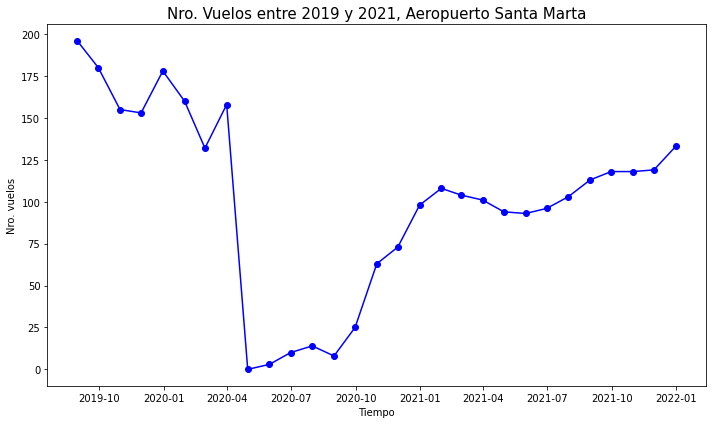

In [112]:
def graficar_linea_tiempo(df, x, y, tituloX, tituloY, titulo, print_limit, is_date_type):
    import pylab
    import matplotlib.pyplot as plt 
    import matplotlib.style as style
    from importlib import reload
    from matplotlib.dates import YearLocator, MonthLocator, DateFormatter
    
   
    colors=[ 'blue', 'darkred']
    plt = reload(plt)
    plt.gca().set_prop_cycle(color=colors)
    plt.title(titulo, fontsize=15)
    plt.xlabel(tituloX)
    plt.ylabel(tituloY)
    
    if is_date_type:
        plt.plot_date(x, y,linestyle ='solid')
        #plt.plot(x, y,linestyle ='solid')
        plt.gcf().set_size_inches(10, 6)
        plt.tight_layout()
    else:
        plt.bar(x, y,linestyle ='solid')
        #plt.plot(x, y,linestyle ='solid')
        plt.gcf().set_size_inches(3, 6)
        plt.tight_layout()
   
    if print_limit:
        ypoints = 50
        plt.axhline(ypoints, 0, 1, label='Max PM10 \n permitido \n (Anual)')
        plt.legend()
    
    
    plt.show()

from datetime import datetime    
    
dates = consolidado_df["Fecha"].astype('str')
x = [datetime.strptime(date, "%Y-%m-%d").date() for date in dates]
y = consolidado_df["Vuelos"]
# y = consolidado_df["mean"]

# tituloX = 'Tiempo'
# tituloY = 'P10(µg/m3)'
# titulo = 'Valores de P10(µg/m3) entre 2019 y 2021, estación Aeropuerto Santa Marta'


tituloX = 'Tiempo'
tituloY = 'Nro. vuelos'
titulo = 'Nro. Vuelos entre 2019 y 2021, Aeropuerto Santa Marta'


graficar_linea_tiempo(consolidado_df, x,  y, tituloX, tituloY, titulo, False, True)  

In [37]:
def trig_transform(x):
    return x[0]

In [38]:
from datetime import datetime 

consolidado_df['anio'] = consolidado_df["Fecha"].dt.year

consolidado_df_avg = consolidado_df.groupby(["anio"], as_index=False)["Vuelos"].mean()

consolidado_df_avg['anio'] = pd.to_numeric(consolidado_df_avg['anio'])
 
consolidado_df_avg['fecha'] = consolidado_df_avg['anio'].map(str) + '-' + '1' + '-' + '1'

consolidado_df_avg['fecha'] = pd.to_datetime(consolidado_df_avg['fecha'])

consolidado_df_avg.tail()

,anio,Vuelos,fecha
0,2019,172.400000,2019-01-01
1,2020,62.000000,2020-01-01
2,2021,108.333333,2021-01-01


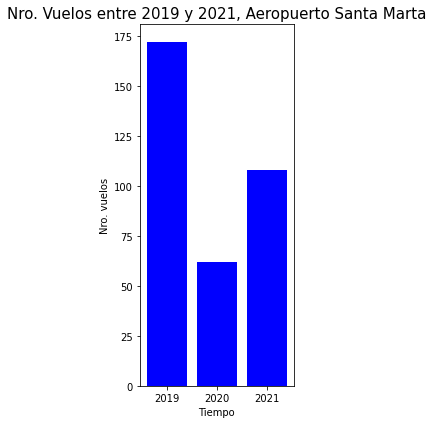

In [39]:
x = consolidado_df_avg["anio"]
y = consolidado_df_avg["Vuelos"]

tituloX = 'Tiempo'
tituloY = 'Nro. vuelos'
titulo = 'Nro. Vuelos entre 2019 y 2021, Aeropuerto Santa Marta'


graficar_linea_tiempo(consolidado_df, x,  y, tituloX, tituloY, titulo, False, False)

In [40]:
consolidado_df.tail()

,Fecha,min,max,mean,std,Llegadas,Salidas,Vuelos,Mes,coyuntura,anio
24,2021-08-31,17.300000,44.000000,32.075000,12.940215,55,58,113,2021-Aug,Covid,2021
25,2021-09-30,24.800000,86.200000,46.420000,16.966359,60,58,118,2021-Sep,Covid,2021
26,2021-10-31,27.300000,99.600000,48.136364,21.591863,54,64,118,2021-Oct,Covid,2021
27,2021-11-30,25.433333,98.713333,51.718882,23.704053,60,59,119,2021-Nov,Covid,2021
28,2021-12-31,34.300000,63.300000,48.422222,7.993556,68,65,133,2021-Dec,Covid,2021


In [41]:
from datetime import datetime 

consolidado_df['anio'] = consolidado_df["Fecha"].dt.year

consolidado_df_mean = consolidado_df.groupby(["anio"], as_index=False)["mean"].mean()

consolidado_df_mean.tail()

,anio,mean
0,2019,42.982833
1,2020,52.733216
2,2021,56.437706


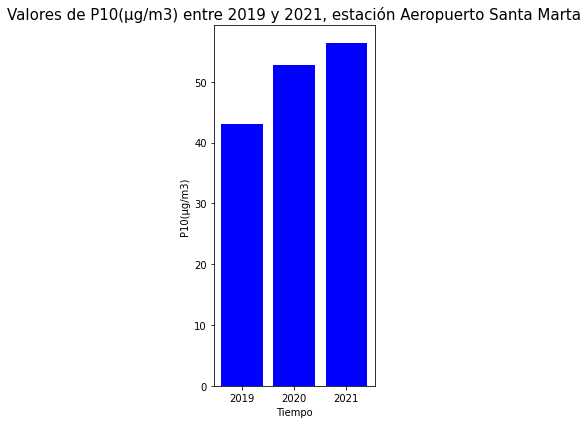

In [42]:
x = consolidado_df_mean["anio"]
y = consolidado_df_mean["mean"]

tituloX = 'Tiempo'
tituloY = 'P10(µg/m3)'
titulo = 'Valores de P10(µg/m3) entre 2019 y 2021, estación Aeropuerto Santa Marta'

graficar_linea_tiempo(consolidado_df_mean, x,  y, tituloX, tituloY, titulo, False, False)

In [43]:
# import matplotlib.pyplot as plt
# import numpy as np

# fig, ax = plt.subplots(figsize=(12, 6))

# x = consolidado_df_avg["anio"]
# y = consolidado_df_avg["mean"]
# z = consolidado_df_avg["mean"]

# ax.plot(y, color='blue', label='Sine wave')
# ax.plot(z, color='black', label='Cosine wave')

# plt.show()

In [44]:
from datetime import datetime  
datetime.today()

datetime.datetime(2022, 2, 8, 20, 37, 47, 183889)

In [45]:
consolidado_df_covid = consolidado_df_avg = consolidado_df.groupby(["coyuntura"], as_index=False)["Vuelos"].mean()

consolidado_df_covid.tail()

,coyuntura,Vuelos
0,Covid,75.904762
1,No Covid,164.000000


In [46]:
nombres = consolidado_df_covid['coyuntura']
cantidades = consolidado_df_covid['Vuelos']

print(nombres, cantidades)

0       Covid
1    No Covid
Name: coyuntura, dtype: object 0     75.904762
1    164.000000
Name: Vuelos, dtype: float64


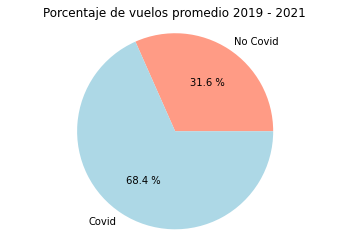

In [47]:
import matplotlib.pyplot as plt

nombres = consolidado_df_covid['coyuntura']
cantidades = consolidado_df_covid['Vuelos']


colores = ["#FF9B85", "lightblue"]
plt.pie(cantidades, labels=["No Covid", "Covid"], autopct="%0.1f %%", colors=colores)
plt.axis("equal")
plt.title("Porcentaje de vuelos promedio 2019 - 2021", fontsize=12)
plt.show()

In [48]:
data_1 = round(float(consolidado_df_covid.query('coyuntura == "Covid"')["Vuelos"]), 2)
data_2 = round(float(consolidado_df_covid.query('coyuntura == "No Covid"')["Vuelos"]), 2)

print(data_1, data_2)

75.9 164.0


In [49]:
data_1 = consolidado_df.query('coyuntura == "Covid"')["Vuelos"].to_list()
data_2 = consolidado_df.query('coyuntura == "No Covid"')["Vuelos"].to_list()

print(data_1, data_2)

[0, 3, 10, 14, 8, 25, 63, 73, 98, 108, 104, 101, 94, 93, 96, 103, 113, 118, 118, 119, 133] [196, 180, 155, 153, 178, 160, 132, 158]


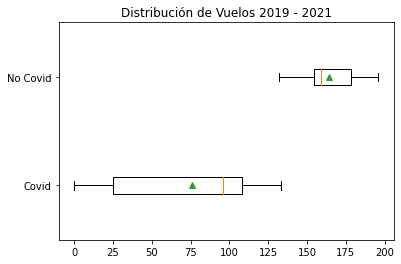

In [50]:
import matplotlib.pyplot as plt 
import numpy as np 

data_a = consolidado_df.query('coyuntura == "Covid"')["Vuelos"].to_list()
data_b = consolidado_df.query('coyuntura == "No Covid"')["Vuelos"].to_list()

data_2d=[data_a,data_b]

plt.boxplot(data_2d, 
            labels=["Covid", "No Covid"], 
            vert=False, 
            showmeans=True, 
            showbox=True,
            showcaps = True,
            showfliers = True        
           )

plt.title("Distribución de Vuelos 2019 - 2021")
plt.show()

In [51]:
consolidado_df_covid = consolidado_df_avg = consolidado_df.groupby(["coyuntura"], as_index=False)["mean"].mean()

consolidado_df_covid.tail()

,coyuntura,mean
0,Covid,51.718882
1,No Covid,54.858589


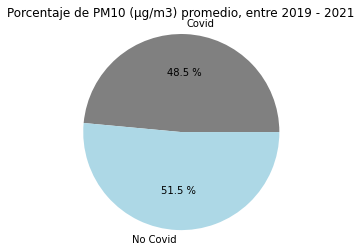

In [52]:
import matplotlib.pyplot as plt

nombres = consolidado_df_covid['coyuntura']
cantidades = consolidado_df_covid['mean']


colores = ["grey", "lightblue"]
plt.pie(cantidades, labels=nombres, autopct="%0.1f %%", colors=colores)
plt.axis("equal")
plt.title("Porcentaje de PM10 (µg/m3) promedio, entre 2019 - 2021", fontsize=12)
plt.show()

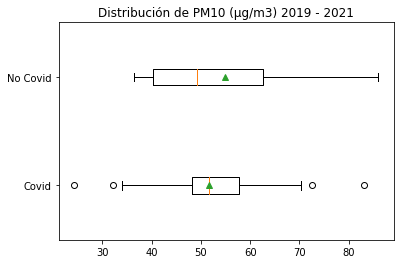

In [53]:
import matplotlib.pyplot as plt 
import numpy as np 

data_a = consolidado_df.query('coyuntura == "Covid"')["mean"].to_list()
data_b = consolidado_df.query('coyuntura == "No Covid"')["mean"].to_list()

data_2d=[data_a,data_b]

plt.boxplot(data_2d, 
            labels=["Covid", "No Covid"], 
            vert=False, 
            showmeans=True, 
            showbox=True,
            showcaps = True,
            showfliers = True        
           )

plt.title("Distribución de PM10 (µg/m3) 2019 - 2021")
plt.show()

In [89]:
df_statistics_covid = nocovid_aero_df.describe()
df_statistics_covid = df_statistics_covid.transpose()
df_statistics_covid

,count,mean,std,min,25%,50%,75%,max
level_0,56.0,27.500000,16.309506,0.00,13.750,27.50,41.250,55.00
index,56.0,27.500000,16.309506,0.00,13.750,27.50,41.250,55.00
Muestra No.,55.0,25227.472727,154.525421,24944.00,25111.000,25241.00,25348.000,25473.00
Filtro No.,55.0,29940.345455,173.951805,29626.00,29814.500,29948.00,30074.500,30227.00
PrI,55.0,20.537091,0.657511,19.24,20.170,20.45,21.040,22.54
PrF,55.0,21.453455,0.636554,20.20,21.110,21.36,21.995,23.41
PrAvg,55.0,39.212364,1.199801,36.90,38.615,39.03,40.200,42.91
Pa,55.0,758.000000,0.000000,758.00,758.000,758.00,758.000,758.00
Ta (°C),55.0,28.000000,0.000000,28.00,28.000,28.00,28.000,28.00
Ta (°K),55.0,301.000000,0.000000,301.00,301.000,301.00,301.000,301.00


In [107]:
df_statistics_covid = covid_aero_df.describe()
df_statistics_covid.rename(columns={'CPM µg/m3': 'PM10'}, inplace=True)
df_statistics_covid = df_statistics_covid.transpose()

df_statistics_covid.loc['PM10', :]




count    135.000000
mean      52.918519
std       29.180108
min       11.100000
25%       34.000000
50%       46.700000
75%       62.400000
max      171.900000
Name: PM10, dtype: float64

In [111]:
consolidado_df_no_cv = consolidado_df.query('coyuntura == "Covid"')

consolidado_df_no_cv = consolidado_df_no_cv.describe()
consolidado_df_no_cv = consolidado_df_no_cv.transpose()
consolidado_df_no_cv.

,count,mean,std,min,25%,50%,75%,max
min,21.0,25.433333,8.810259,11.100000,22.200000,25.433333,25.433333,51.800000
max,21.0,98.713333,31.033206,39.100000,93.900000,98.713333,103.300000,171.900000
mean,21.0,51.718882,13.644560,24.257143,48.136364,51.718882,57.730000,83.200000
std,21.0,23.704053,9.567292,7.244045,20.454125,23.704053,24.596703,44.309254
Llegadas,21.0,38.619048,23.359101,0.000000,12.000000,49.000000,55.000000,68.000000
Salidas,21.0,37.285714,22.365471,0.000000,13.000000,47.000000,51.000000,65.000000
Vuelos,21.0,75.904762,45.476263,0.000000,25.000000,96.000000,108.000000,133.000000
anio,21.0,2020.571429,0.507093,2020.000000,2020.000000,2021.000000,2021.000000,2021.000000


In [ ]:
data_a = consolidado_df.query('coyuntura == "Covid"')["Vuelos"].to_list()

In [68]:
consolidado_df

,Fecha,min,max,mean,std,Llegadas,Salidas,Vuelos,Mes,coyuntura,anio
0,2019-08-31,25.100000,56.000000,42.500000,12.814315,96,100,196,2019-Aug,No Covid,2019
1,2019-09-30,17.700000,66.100000,40.316667,17.066742,90,90,180,2019-Sep,No Covid,2019
2,2019-10-31,20.600000,63.700000,39.960000,20.261244,74,81,155,2019-Oct,No Covid,2019
3,2019-11-30,19.600000,70.900000,36.337500,19.092926,81,72,153,2019-Nov,No Covid,2019
4,2019-12-31,26.000000,97.100000,55.800000,23.178007,89,89,178,2019-Dec,No Covid,2019
5,2020-01-31,29.900000,80.200000,56.254545,16.198911,81,79,160,2020-Jan,No Covid,2020
6,2020-02-29,42.000000,146.100000,81.666667,35.530700,71,61,132,2020-Feb,No Covid,2020
7,2020-03-31,28.500000,217.800000,86.033333,66.820795,78,80,158,2020-Mar,No Covid,2020
8,2020-04-30,25.433333,98.713333,51.718882,23.704053,0,0,0,2020-Apr,Covid,2020
9,2020-05-31,25.433333,98.713333,51.718882,23.704053,1,2,3,2020-May,Covid,2020
